In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

print("All library imported successfully. ")


All library imported successfully. 


In [11]:
url = "https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv"

heart_disease = pd.read_csv(url)
print("first 5 rows of the dataset:")
heart_disease.head()

first 5 rows of the dataset:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
print("=" *50)
print("DATASET INFORMATION")
print("=" *50)
print(f"\nNumber of rows(patients): {heart_disease.shape[0]}")
print(f"Number of columns(features): {heart_disease.shape[1]}")
print(f"\nColumn names:")
print(heart_disease.columns.tolist())


DATASET INFORMATION

Number of rows(patients): 303
Number of columns(features): 14

Column names:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


target variable distribution:
target
1    165
0    138
Name: count, dtype: int64


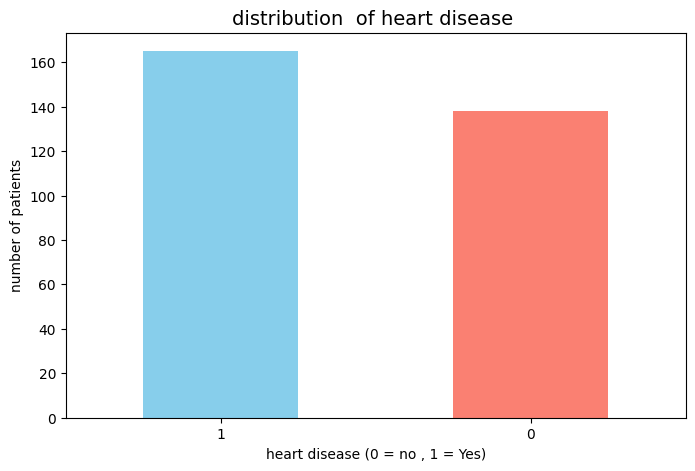

In [ ]:
print("target variable distribution:")
print(heart_disease['target'].value_counts()) # targetni qabul qilib olish
plt.figure(figsize=(8,5))
heart_disease['target'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('distribution  of heart disease ', fontsize=14)
plt.xlabel('heart disease (0 = no , 1 = Yes)')
plt.ylabel('number of patients')
plt.xticks(rotation=0)
plt.show()

In [14]:
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

print("features (X) shape:", X.shape)
print("target (y) shape:", y.shape)
print("\nfirst 5 rows of features (X):")
X.head()

features (X) shape: (303, 13)
target (y) shape: (303,)

first 5 rows of features (X):


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
print("data split completed.")
print(f"X_train set size: {len(X_train)} patients")
print(f"testing set size: {len(X_test)} patients")


data split completed.
X_train set size: 242 patients
testing set size: 61 patients


In [16]:
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42

)
print("model created")
print(f"\nmodel type: {type(model).__name__}")
print(f"Number of trees: {model.n_estimators}")


model created

model type: RandomForestClassifier
Number of trees: 100


In [17]:
print("Training the model...")
model.fit(X_train, y_train)
print("model trained successfully.")


Training the model...
model trained successfully.


In [18]:
y_pred = model.predict(X_test)
print("first 10 predictions:", y_pred[:10])
print("first 10 actual values:", y_test.values[:10])
print("\nRemember: 1 = has heart disease, 0 = no heart disease")


first 10 predictions: [0 1 1 0 1 1 1 0 0 0]
first 10 actual values: [0 0 1 0 1 1 1 0 0 1]

Remember: 1 = has heart disease, 0 = no heart disease


In [19]:
comparison = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred,
    'Correct?': y_test.values == y_pred
})

print("comparison of first 15 predictions:")
comparison.head(15)

comparison of first 15 predictions:


,Actual,Predicted,Correct?
0,0,0,True
1,0,1,False
2,1,1,True
3,0,0,True
4,1,1,True
5,1,1,True
6,1,1,True
7,0,0,True
8,0,0,True
9,1,0,False


In [21]:
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print("Model accuracy:")
print("-" * 40)
print(f"Training set accuracy: {train_accuracy:.2%}")
print(f"Testing set accuracy: {test_accuracy:.2%}")


Model accuracy:
----------------------------------------
Training set accuracy: 100.00%
Testing set accuracy: 83.61%


In [23]:
tree_counts = [10, 50, 100, 200, 500]
results = []
print("experimenting with different number of trees...")
print("=" * 50)

for n_trees in tree_counts:
    temp_model = RandomForestClassifier(
        n_estimators=n_trees,
        random_state=42
    )

    temp_model.fit(X_train, y_train)
    accuracy = temp_model.score(X_test, y_test)
    results.append(accuracy)
    print(f"trees: {n_trees:3d} --> test accuracy: {accuracy:.2%}")
print("\nExperiment completed.")

experimenting with different number of trees...
trees:  10 --> test accuracy: 85.25%
trees:  50 --> test accuracy: 86.89%
trees: 100 --> test accuracy: 83.61%
trees: 200 --> test accuracy: 83.61%
trees: 500 --> test accuracy: 83.61%

Experiment completed.


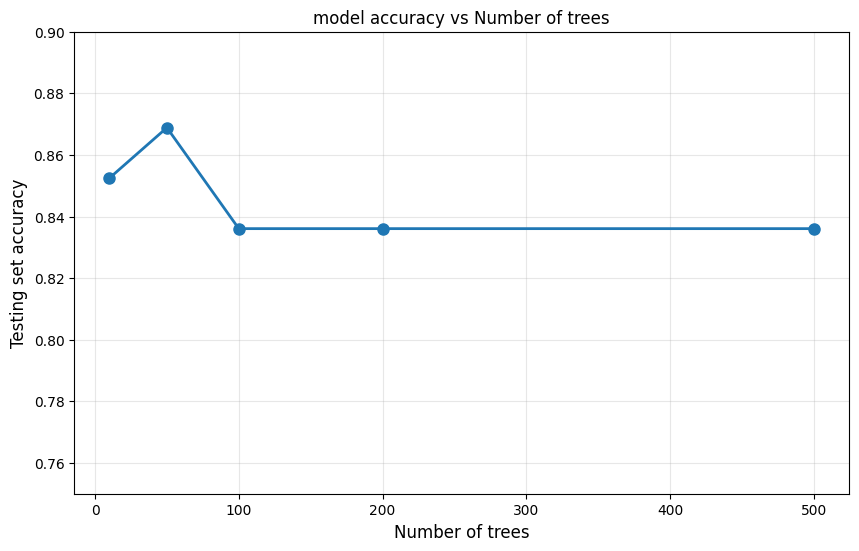

In [25]:
plt.figure(figsize=(10,6))
plt.plot(tree_counts, results, marker='o', linewidth =2, markersize=8)
plt.xlabel('Number of trees',fontsize =12)
plt.ylabel('Testing set accuracy', fontsize = 12)
plt.title('model accuracy vs Number of trees', fontsize=12)
plt.grid(True, alpha=0.3)
plt.ylim(0.75,0.90)
plt.show()

In [27]:
import pickle
model_filename = 'heart_disease_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)
print(f"model saved to {model_filename}")

model saved to heart_disease_model.pkl


In [ ]:
with open(model_filename, 'rb') as file:
    loaded_model = pickle.load(file)

loaded_accuracy = loaded_model.score(X_test, y_test)
print(f"loaded model accuracy: {loaded_accuracy:.2%}")
print("model loaded from disk.")